<a href="https://colab.research.google.com/github/Tanvir007/Deep-Learning-for-Sewage-Treatment-Plant/blob/main/DTP06_Artificial_Neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Load the data from CSV file
data = pd.read_csv('/content/drive/MyDrive/BUET Thesis/DSTP Data.csv')

In [ ]:
# Step 1: Data Preparation for ANN to Predict COD Removal Efficiency
# Calculating COD Removal Efficiency
data['COD_Removal_Efficiency'] = (data['InCOD'] - data['EfCOD']) / data['InCOD'] * 100


In [ ]:
# Selecting features and target variable for COD prediction
X_cod_ann = data[['InpH', 'EfpH', 'InBOD', 'EfBOD', 'InAmmonia', 'InSS', 'InPhosphate']]
y_cod_ann = data['COD_Removal_Efficiency']

In [ ]:
# Scaling the features
X_cod_ann_scaled = scaler.fit_transform(X_cod_ann)

# Splitting the data into training and testing sets (80-20 split)
X_train_cod, X_test_cod, y_train_cod, y_test_cod = train_test_split(X_cod_ann_scaled, y_cod_ann, test_size=0.2, random_state=42)

# Step 2: Defining the ANN Model for COD Prediction
ann_model_cod = MLPRegressor(hidden_layer_sizes=(50, 50), activation='relu', solver='adam', max_iter=1000, random_state=42)

# Step 3: Training the ANN Model
ann_model_cod.fit(X_train_cod, y_train_cod)

# Step 4: Making Predictions
y_train_pred_cod = ann_model_cod.predict(X_train_cod)
y_test_pred_cod = ann_model_cod.predict(X_test_cod)

# Step 5: Calculating Evaluation Metrics
r2_train_cod = r2_score(y_train_cod, y_train_pred_cod)
r2_test_cod = r2_score(y_test_cod, y_test_pred_cod)
mae_cod = mean_absolute_error(y_test_cod, y_test_pred_cod)
mdse_cod = median_absolute_error(y_test_cod, y_test_pred_cod)

NameError: name 'scaler' is not defined

In [ ]:
# Select features and target
selected_features = ['day', 'month', 'year','InQuantitySLSMLD','InpH', 'InCOD', 'InBOD', 'InAmmonia', 'InSS', 'InPhosphate', 'InFecalColiform','EfpH','EfCOD','EfBOD','EfAmmonia','EfSS','EfPhosphate','EfFecalColiform'	]

X = data[selected_features]
y = data['EfDischargetoGojariaMLD']

In [ ]:
# Split the data into a training set (70%) and a test set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the Artificial Neural Network (ANN) model
model = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predict on the training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate evaluation metrics
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate mean absolute percentage error (MAPE)
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_train = calculate_mape(y_train, y_train_pred)
mape_test = calculate_mape(y_test, y_test_pred)

In [ ]:
# Print the evaluation metrics
print("RMSE (Train):", rmse_train)
print("RMSE (Test):", rmse_test)
print("MAE (Train):", mae_train)
print("MAE (Test):", mae_test)
print("MAPE (Train):", mape_train)
print("MAPE (Test):", mape_test)
print("R-squared (Train):", r2_train)
print("R-squared (Test):", r2_test)

RMSE (Train): 407.8848969327335
RMSE (Test): 390.30422675665284
MAE (Train): 342.2471058831693
MAE (Test): 323.12400944216546
MAPE (Train): 93.98411909028562
MAPE (Test): 89.16490085417445
R-squared (Train): -67.36944660546128
R-squared (Test): -57.1926389418201


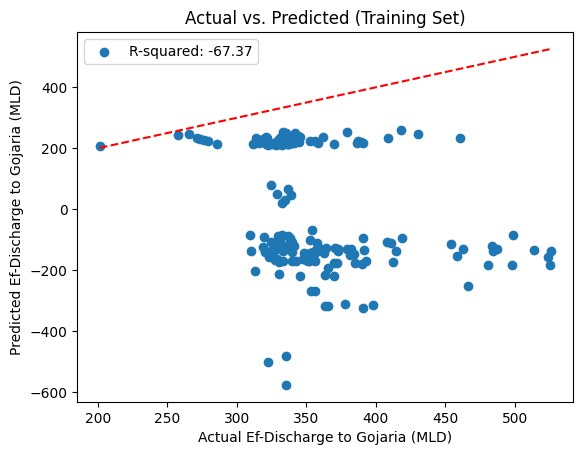

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot for training set
plt.scatter(y_train, y_train_pred, label=f"R-squared: {r2_train:.2f}")
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.xlabel("Actual Ef-Discharge to Gojaria (MLD)")
plt.ylabel("Predicted Ef-Discharge to Gojaria (MLD)")
plt.legend()
plt.title("Actual vs. Predicted (Training Set)")
plt.show()


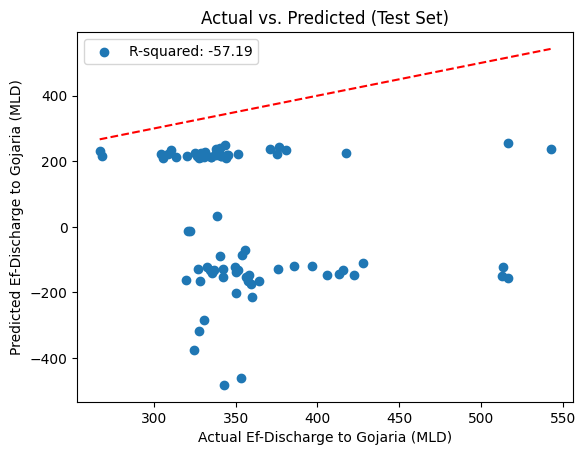

In [ ]:
# Scatter plot for test set
plt.scatter(y_test, y_test_pred, label=f"R-squared: {r2_test:.2f}")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Ef-Discharge to Gojaria (MLD)")
plt.ylabel("Predicted Ef-Discharge to Gojaria (MLD)")
plt.legend()
plt.title("Actual vs. Predicted (Test Set)")
plt.show()


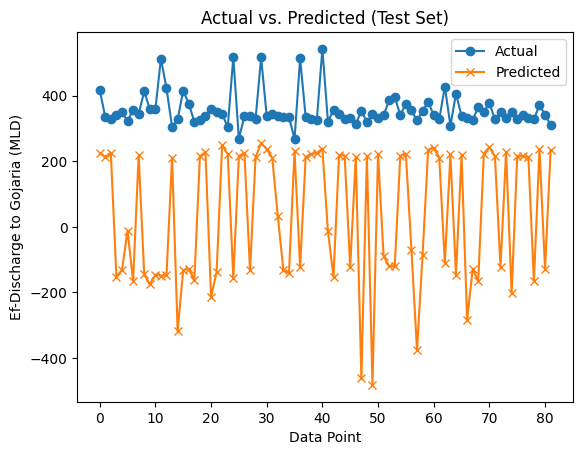

In [ ]:
# Line plot for actual and predicted values
plt.plot(y_test.values, label="Actual", marker='o')
plt.plot(y_test_pred, label="Predicted", marker='x')
plt.xlabel("Data Point")
plt.ylabel("Ef-Discharge to Gojaria (MLD)")
plt.legend()
plt.title("Actual vs. Predicted (Test Set)")
plt.show()


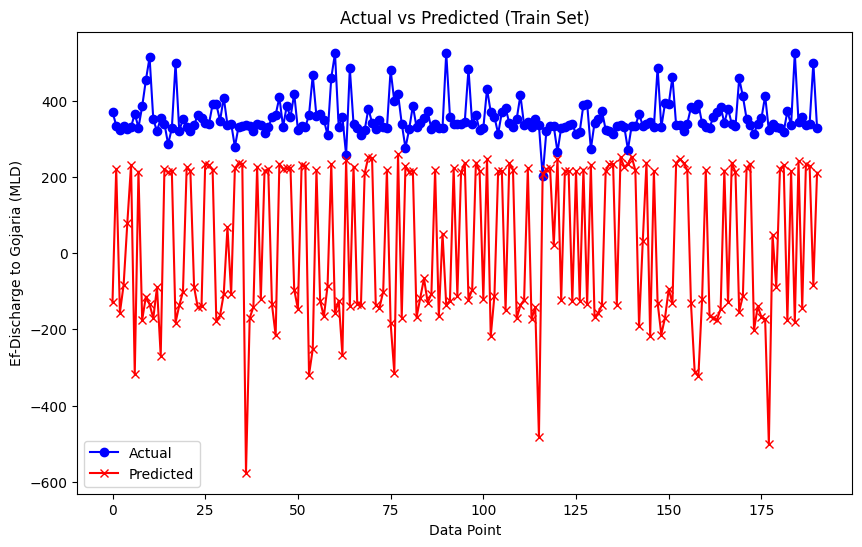

In [ ]:
# Line plot for actual and predicted values (Train Set)
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_train)), y_train, label="Actual", marker='o', color='blue')
plt.plot(range(len(y_train_pred)), y_train_pred, label="Predicted", marker='x', color='red')
plt.xlabel("Data Point")
plt.ylabel("Ef-Discharge to Gojaria (MLD)")
plt.title("Actual vs Predicted (Train Set)")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score
import numpy as np

# Calculate the regular R-squared for the training and testing sets
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate the number of data points (n) and predictors (k)
n = len(X_train)
k = X_train.shape[1]

# Calculate the residuals
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

# Calculate the AIC, HQIC, and BIC
def calculate_information_criteria(residuals, n, k, criterion):
    sse = np.sum(residuals**2)
    if criterion == "AIC":
        return 2 * k - 2 * np.log(sse)
    elif criterion == "HQIC":
        return 2 * k - 2 * np.log(sse) + 2 * k * (k + 1) / (n - k - 1)
    elif criterion == "BIC":
        return n * np.log(sse / n) + k * np.log(n)
    else:
        return None

train_aic = calculate_information_criteria(train_residuals, n, k, "AIC")
test_aic = calculate_information_criteria(test_residuals, n, k, "AIC")

train_hqic = calculate_information_criteria(train_residuals, n, k, "HQIC")
test_hqic = calculate_information_criteria(test_residuals, n, k, "HQIC")

train_bic = calculate_information_criteria(train_residuals, n, k, "BIC")
test_bic = calculate_information_criteria(test_residuals, n, k, "BIC")

# Calculate the adjusted R-squared for training and testing sets
adjusted_train_r2 = 1 - (1 - train_r2) * (n - 1) / (n - k - 1)
adjusted_test_r2 = 1 - (1 - test_r2) * (n - 1) / (n - k - 1)

print(f"AIC (Training Set): {train_aic:.4f}")
print(f"AIC (Testing Set): {test_aic:.4f}")
print(f"HQIC (Training Set): {train_hqic:.4f}")
print(f"HQIC (Testing Set): {test_hqic:.4f}")
print(f"BIC (Training Set): {train_bic:.4f}")
print(f"BIC (Testing Set): {test_bic:.4f}")
print(f"Adjusted R-squared (Training Set): {adjusted_train_r2:.4f}")
print(f"Adjusted R-squared (Testing Set): {adjusted_test_r2:.4f}")


AIC (Training Set): 1.4515
AIC (Testing Set): 3.3189
HQIC (Training Set): 5.4283
HQIC (Testing Set): 7.2956
BIC (Training Set): 2390.7372
BIC (Testing Set): 2212.4060
Adjusted R-squared (Training Set): -74.5244
Adjusted R-squared (Testing Set): -63.2826


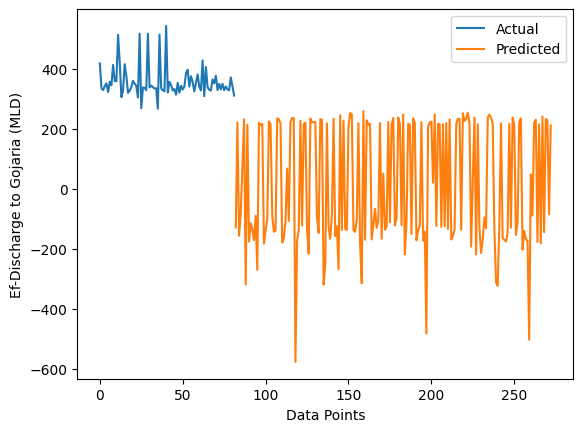

In [ ]:
# Line plot for actual and predicted values
plt.plot(range(len(y_test)), y_test, label="Actual")
plt.plot(range(len(y_test), len(y_test) + len(y_train_pred)), y_train_pred, label="Predicted")
plt.xlabel("Data Points")
plt.ylabel("Ef-Discharge to Gojaria (MLD)")
plt.legend()
plt.show()

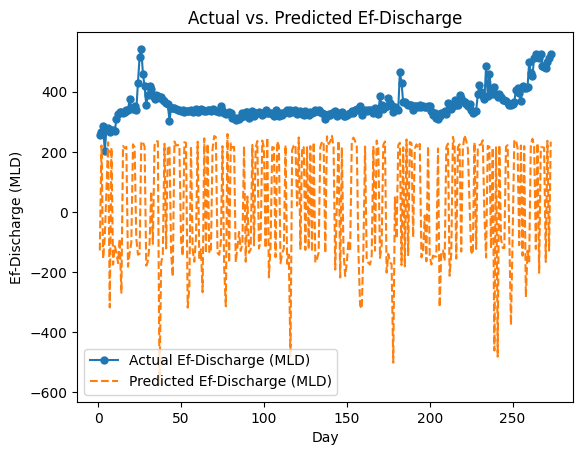

In [ ]:
# Create an array of day numbers for the x-axis
days = np.arange(1, len(data) + 1)

# Create a line plot
plt.plot(days, y, label="Actual Ef-Discharge (MLD)", marker='o', markersize=5)
plt.plot(days, np.concatenate((y_train_pred, y_test_pred)), label="Predicted Ef-Discharge (MLD)", linestyle='--')
plt.xlabel("Day")
plt.ylabel("Ef-Discharge (MLD)")
plt.title("Actual vs. Predicted Ef-Discharge")
plt.legend()
plt.show()